# Question 1
How does average trip duration in minutes change during the week?

Download .csv files

In [1]:
import pandas as pd

df = pd.read_csv('yellow_tripdata_2018-06.csv')
tm = pd.read_csv('taxi _zone_lookup.csv')

Convert time to datetime format.
<br>
Add Years, Months and Hours columns to find outliers.

In [2]:
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
Year = lambda row: int(row.tpep_pickup_datetime.strftime('%Y'))
Month = lambda row: int(row.tpep_pickup_datetime.strftime('%m'))
Hour = lambda row: int(row.tpep_pickup_datetime.strftime('%H'))
df['Year'] = df.apply(Year, axis = 1)
df['Month'] = df.apply(Month, axis = 1)
df['Hour'] = df.apply(Hour, axis = 1)
print(df.head())
print(df.info())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2018-06-01 00:15:40   2018-06-01 00:16:46                1   
1         1  2018-06-01 00:04:18   2018-06-01 00:09:18                1   
2         1  2018-06-01 00:14:39   2018-06-01 00:29:46                1   
3         1  2018-06-01 00:51:25   2018-06-01 00:51:29                3   
4         1  2018-06-01 00:55:06   2018-06-01 00:55:10                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.0           1                  N           145           145   
1            1.0           1                  N           230           161   
2            3.3           1                  N           100           263   
3            0.0           1                  N           145           145   
4            0.0           1                  N           145           145   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


Group by Years and Months to find out outliers.

In [3]:
average_year = df.groupby('Year').total_amount.mean().reset_index()
print(average_year)
average_months = df.groupby('Month').total_amount.mean().reset_index()
print(average_months)

   Year  total_amount
0  2002      3.300000
1  2008     15.759500
2  2009     24.803636
3  2018     16.660194
4  2019     12.480000
    Month  total_amount
0       1     22.395556
1       2      8.875714
2       3     12.025000
3       4      9.306000
4       5     17.307059
5       6     16.660220
6       7     15.670221
7       8     13.882222
8       9     13.630588
9      10     10.031429
10     11     10.566923
11     12     13.935926


 Only year 2018 and month 6 must remain in the dataframe. Remove irrelevant years and months from dataframe.

In [4]:
clean_df4 = df[(df.Year == 2018) & (df.Month == 6)]
clean_df3 = clean_df4.reset_index(drop=True)
print(clean_df3.head())
print(clean_df3.info())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2018-06-01 00:15:40   2018-06-01 00:16:46                1   
1         1  2018-06-01 00:04:18   2018-06-01 00:09:18                1   
2         1  2018-06-01 00:14:39   2018-06-01 00:29:46                1   
3         1  2018-06-01 00:51:25   2018-06-01 00:51:29                3   
4         1  2018-06-01 00:55:06   2018-06-01 00:55:10                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.0           1                  N           145           145   
1            1.0           1                  N           230           161   
2            3.3           1                  N           100           263   
3            0.0           1                  N           145           145   
4            0.0           1                  N           145           145   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


Add columns diff_time, minutes_trip and weekday to the dataframe.

In [5]:
diff_time = lambda row: row.tpep_dropoff_datetime - row.tpep_pickup_datetime
minutes_trip = lambda row: int(row.diff_time.total_seconds() / 60)
clean_df3['diff_time'] = clean_df3.apply(diff_time, axis = 1)
clean_df3['minutes_trip'] = clean_df3.apply(minutes_trip, axis = 1)
clean_df3['weekday'] = clean_df3['tpep_dropoff_datetime'].dt.weekday
print(clean_df3.tail(10))

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
8713297         2  2018-06-30 22:59:16   2018-06-30 23:13:46                3   
8713298         2  2018-06-30 23:36:14   2018-06-30 23:40:03                4   
8713299         2  2018-06-30 23:41:17   2018-07-01 00:00:36                3   
8713300         2  2018-06-30 23:18:21   2018-06-30 23:30:27                1   
8713301         2  2018-06-30 23:45:36   2018-07-01 00:02:02                1   
8713302         2  2018-06-30 23:09:48   2018-06-30 23:21:09                1   
8713303         1  2018-06-30 23:39:24   2018-06-30 23:45:02                3   
8713304         2  2018-06-30 23:24:13   2018-06-30 23:34:31                2   
8713305         2  2018-06-30 23:46:15   2018-06-30 23:57:42                1   
8713306         2  2018-06-30 23:43:59   2018-06-30 23:43:59                1   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
8713297           2.46           1   

Remove trip_distance = 0 and minutes_trip = 0 from dataframe.

In [6]:
clean_df2 = clean_df3[(clean_df3.trip_distance != 0) & (clean_df3.minutes_trip != 0)]
clean_df = clean_df2.reset_index(drop=True)
print(clean_df.head(10))
print(clean_df.info())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2018-06-01 00:04:18   2018-06-01 00:09:18                1   
1         1  2018-06-01 00:14:39   2018-06-01 00:29:46                1   
2         1  2018-06-01 00:09:00   2018-06-01 00:24:01                1   
3         1  2018-06-01 00:02:33   2018-06-01 00:13:01                2   
4         1  2018-06-01 00:13:23   2018-06-01 00:16:52                1   
5         1  2018-06-01 00:24:29   2018-06-01 01:08:43                1   
6         2  2018-06-01 00:17:01   2018-06-01 00:23:16                1   
7         2  2018-06-01 00:25:17   2018-06-01 00:47:24                1   
8         1  2018-06-01 00:39:42   2018-06-01 00:57:23                1   
9         1  2018-06-01 00:25:43   2018-06-01 00:40:07                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.00           1                  N           230           161   
1           3.30

Calculate average trip duration in minutes change during the week.

In [7]:
average_trip = clean_df.groupby('weekday').minutes_trip.mean().reset_index()
print(average_trip)

   weekday  minutes_trip
0        0     16.981738
1        1     16.981777
2        2     17.498484
3        3     18.461866
4        4     17.225612
5        5     16.069444
6        6     18.161233


Plot graph to visualize data.

B:\Programmes\Anaconda\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


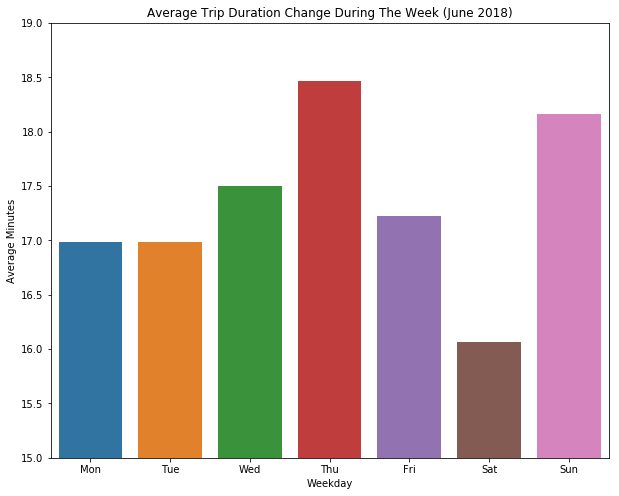

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10,8))

sns.barplot(data=average_trip, x='weekday', y='minutes_trip')
ax = plt.subplot()
plt.axis([-0.5, 6.5, 15, 19])
ax.set_xticks(range(len(weekdays)))
ax.set_xticklabels(weekdays)
plt.xlabel('Weekday')
plt.ylabel('Average Minutes')
plt.title('Average Trip Duration Change During The Week (June 2018)')
plt.savefig('Question1.png')

plt.show()

# Question 2
Take only the trips between different boroughs. Which pair of different boroughs results in the
highest average trip fare?

Merge two .csv files to match Location ID and boroughs.

In [10]:
PUboroughs = pd.merge(
        clean_df,
        tm,
        left_on = 'PULocationID',
        right_on = 'LocationID',
        )
PUboroughs.rename(columns={'LocationID': 'PULocationID',
                          'Borough' : 'BoroughPU'}, inplace=True)
print(PUboroughs.tail(10))
combined_df = pd.merge(
        PUboroughs,
        tm,
        left_on = 'DOLocationID',
        right_on = 'LocationID',
        )
combined_df.rename(columns={'LocationID': 'DOLocationID',
                          'Borough' : 'BoroughDO'}, inplace=True)
combined_df = combined_df.drop(['Zone_x', 'service_zone_x', 'Zone_y', 'service_zone_y'], axis=1)
print(combined_df.head())
print(combined_df.info())

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
8621729         2  2018-06-10 20:13:42   2018-06-10 20:44:43                6   
8621730         1  2018-06-10 11:36:38   2018-06-10 11:45:24                1   
8621731         2  2018-06-15 01:00:03   2018-06-15 01:54:34                1   
8621732         2  2018-06-20 21:12:03   2018-06-20 21:26:12                1   
8621733         1  2018-06-28 11:35:58   2018-06-28 11:46:39                1   
8621734         2  2018-06-10 17:05:03   2018-06-10 17:28:32                5   
8621735         2  2018-06-20 20:59:04   2018-06-20 21:09:47                1   
8621736         2  2018-06-27 14:12:08   2018-06-27 14:16:26                1   
8621737         1  2018-06-25 02:43:01   2018-06-25 02:46:00                1   
8621738         1  2018-06-25 02:46:45   2018-06-25 02:47:56                1   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
8621729          16.88           1   

Different boroughs dataframe called "db_combined_df"

In [11]:
db_combined_df1 = combined_df[(combined_df.BoroughPU != combined_df.BoroughDO)]
db_combined_df = db_combined_df1.reset_index(drop=True)
diff_boroughs_stat = db_combined_df.groupby(['BoroughPU', 'BoroughDO']).total_amount.mean().reset_index()
diff_boroughs_stat_max = diff_boroughs_stat.loc[diff_boroughs_stat['total_amount'].idxmax()]
print(diff_boroughs_stat)
print(diff_boroughs_stat_max)

        BoroughPU      BoroughDO  total_amount
0           Bronx       Brooklyn     64.914632
1           Bronx            EWR    119.714000
2           Bronx      Manhattan     26.770413
3           Bronx         Queens     48.342028
4           Bronx  Staten Island    100.493333
5           Bronx        Unknown     68.661868
6        Brooklyn          Bronx     60.540225
7        Brooklyn            EWR    100.975577
8        Brooklyn      Manhattan     24.936864
9        Brooklyn         Queens     33.075368
10       Brooklyn  Staten Island     58.482561
11       Brooklyn        Unknown     83.001336
12            EWR       Brooklyn    112.577500
13            EWR      Manhattan     95.623571
14            EWR         Queens    109.995000
15            EWR  Staten Island     77.800000
16            EWR        Unknown     53.369167
17      Manhattan          Bronx     32.475894
18      Manhattan       Brooklyn     28.367075
19      Manhattan            EWR     98.231671
20      Manha

# Question 3
Drivers are unsatisfied with fares from Manhattan during evening peak hours on working days.
Management team wants to introduce subsidies (dollars per ride) in such hours. Identify which hours
are most likely the problem ones and estimate possible value of X considering monthly budget of
$6mln.

To identify rush hours in the evening (assumption that extra of 1.0 dollar is for rush hour).

In [12]:
manh_rush3 = PUboroughs[(PUboroughs.weekday != 5) & (PUboroughs.weekday != 6) & (PUboroughs.extra == 1.0)]
manh_rush2 = manh_rush3.reset_index(drop=True)
manh_rush2 = manh_rush2.drop(['Zone', 'service_zone', 'diff_time'], axis=1)
print(manh_rush2.head())
print(manh_rush2.info())
rush_hour = manh_rush2.groupby(['extra', 'Hour']).minutes_trip.count().reset_index()
print(rush_hour)

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2018-06-01 15:49:06   2018-06-01 15:53:08                1   
1         1  2018-06-01 15:54:51   2018-06-01 16:03:38                1   
2         1  2018-06-01 15:53:44   2018-06-01 16:04:58                2   
3         1  2018-06-01 15:55:25   2018-06-01 16:10:44                1   
4         1  2018-06-01 15:54:48   2018-06-01 16:11:20                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.4           1                  N           230           230   
1            0.8           1                  N           230           162   
2            1.5           1                  N           230           237   
3            2.5           1                  N           230           151   
4            2.3           1                  N           230           238   

   payment_type    ...      tolls_amount  improvement_surcharge  total_amo

Identified that evening rush hour are from 16 to 20. Take values between and only during working days.

In [13]:
manh_rush1 = PUboroughs[(PUboroughs.Hour >= 16) & (PUboroughs.Hour < 20) \
                       & (PUboroughs.weekday != 5) & (PUboroughs.weekday != 6) & (PUboroughs.extra == 1.0)]
manh_rush = manh_rush1.reset_index(drop=True)
manh_rush = manh_rush.drop(['Zone', 'service_zone', 'diff_time', 'minutes_trip'], axis=1)
print(manh_rush.head())
print(manh_rush.info())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2018-06-01 16:50:11   2018-06-01 17:32:11                2   
1         1  2018-06-01 16:16:14   2018-06-01 16:20:33                1   
2         1  2018-06-01 16:32:24   2018-06-01 16:49:43                1   
3         1  2018-06-01 16:23:32   2018-06-01 16:44:39                1   
4         2  2018-06-01 16:49:52   2018-06-01 17:04:59                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.60           1                  N           230           144   
1           0.60           1                  N           230            50   
2           1.70           1                  N           230            90   
3           1.20           1                  N           230           229   
4           1.06           1                  N           230           163   

   payment_type    ...      tip_amount  tolls_amount  improvement_surcharg

There were 1,361,794 trips between 16 and 20 (rush hour) from Manhattan on working days in June. Given monthly budget of 6mln the amount of possible subsidies could be (6,000,000 / 1,361,794) = $4.40.

In [14]:
average_hour = manh_rush.groupby('Hour').total_amount.mean().reset_index()
print(average_hour)

   Hour  total_amount
0    16     17.067178
1    17     16.611379
2    18     15.683575
3    19     15.067003
